In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


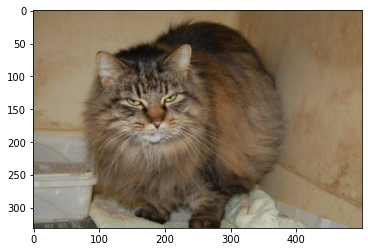

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

drive_path = '/content/drive/MyDrive/'
img = mpimg.imread(drive_path + 
                   'data/Customed_Cat_Dog/train/cat.11000.jpg')
imgplot = plt.imshow(img)

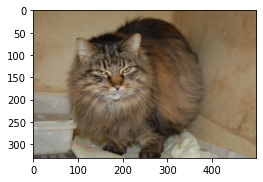

In [35]:
import matplotlib.pyplot as plt
import cv2                
import numpy as np

img_bgr = cv2.imread(drive_path + 
                     'data/Customed_Cat_Dog/train/cat.11000.jpg', 1)
im_rgb  = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(4,4))
plt.imshow(im_rgb)

In [36]:
import tensorflow as tf
import tensorflow.keras as keras

drive_path = '/content/drive/MyDrive/'

BUFFER_SIZE = 32*10
BATCH_SIZE  = 32
IMG_WIDTH   = 224
IMG_HEIGHT  = 224

def load(image_file):
    image = tf.io.read_file(image_file)
    image = tf.image.decode_jpeg(image)
        
    input_image  = tf.image.resize(image, (IMG_HEIGHT, IMG_WIDTH))
    target_image = tf.image.resize(image, (IMG_HEIGHT, IMG_WIDTH))
    
    input_image  = tf.cast(input_image, tf.float32)
    target_image = tf.cast(target_image, tf.float32)

    noise_level = 30.0
    noise = tf.random.normal((IMG_HEIGHT, IMG_WIDTH, 3))*noise_level    
    input_image = input_image + noise  

    # clip
    input_image = tf.clip_by_value(input_image, 0.0, 255.0)

    # normalize
    input_image  = input_image / 255.0
    target_image = target_image / 255.0

    return input_image, target_image

(224, 224, 3)
(224, 224, 3)


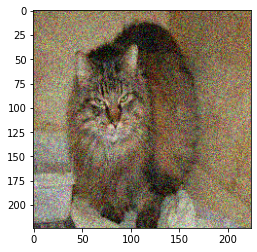

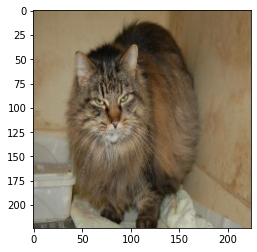

In [37]:
input_image, target_image = load(drive_path + 
                                 'data/Customed_Cat_Dog/train/cat.11000.jpg')
print(input_image.shape)
print(target_image.shape)


# casting to int for matplotlib to show the image
plt.figure()
plt.imshow(input_image)
plt.figure()
plt.imshow(target_image)

In [43]:
# train_dataset
train_dataset = tf.data.Dataset.list_files(drive_path + 
                                           'data/Customed_Cat_Dog/train/*.jpg')
train_dataset = train_dataset.map(load, 
                                  num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)
#train_dataset = train_dataset.prefetch(buffer_size=BUFFER_SIZE)

# test_dataset
test_dataset = tf.data.Dataset.list_files(drive_path + 
                                          'data/Customed_Cat_Dog/test/*.jpg')
test_dataset = test_dataset.map(load)
test_dataset = test_dataset.batch(BATCH_SIZE)
#test_dataset = test_dataset.prefetch(buffer_size=BUFFER_SIZE)

In [39]:
for X,Y in train_dataset:
  print(X.shape)
  print(Y.shape)
  break

(32, 224, 224, 3)
(32, 224, 224, 3)


In [40]:
# model
model = keras.models.Sequential()
model.add(tf.keras.Input(shape=(224,224,3)))
model.add(keras.layers.Conv2D(filters=32, 
                              kernel_size=3,
                              padding='same'))
model.add(tf.keras.layers.LeakyReLU())
model.add(keras.layers.Conv2D(filters=64, 
                              kernel_size=3,
                              padding='same'))
model.add(tf.keras.layers.LeakyReLU())
model.add(keras.layers.Conv2D(filters=128, 
                              kernel_size=3,
                              padding='same'))
model.add(tf.keras.layers.LeakyReLU())
model.add(keras.layers.Conv2D(filters=64, 
                              kernel_size=3,
                              padding='same'))
model.add(tf.keras.layers.LeakyReLU())
model.add(keras.layers.Conv2D(filters=3, 
                              kernel_size=1, 
                              activation='sigmoid',
                              padding='same'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 224, 224, 32)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 224, 224, 64)      18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 224, 224, 64)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 224, 224, 128)     73856     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 224, 224, 128)     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 224, 224, 64)     

In [41]:
# train
optimizer = tf.keras.optimizers.Adam(0.0001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=['mean_absolute_error'])
history_data = model.fit(train_dataset,
                         epochs=50)

Epoch 1/50
94/94 [==============================] - 59s 549ms/step - loss: 0.1627 - mean_absolute_error: 0.1627
Epoch 2/50
94/94 [==============================] - 49s 507ms/step - loss: 0.0537 - mean_absolute_error: 0.0537
Epoch 3/50
94/94 [==============================] - 49s 508ms/step - loss: 0.0429 - mean_absolute_error: 0.0429
Epoch 4/50
94/94 [==============================] - 49s 510ms/step - loss: 0.0395 - mean_absolute_error: 0.0395
Epoch 5/50
94/94 [==============================] - 49s 511ms/step - loss: 0.0377 - mean_absolute_error: 0.0377
Epoch 6/50
94/94 [==============================] - 49s 509ms/step - loss: 0.0369 - mean_absolute_error: 0.0369
Epoch 7/50
94/94 [==============================] - 49s 511ms/step - loss: 0.0360 - mean_absolute_error: 0.0360
Epoch 8/50
94/94 [==============================] - 49s 511ms/step - loss: 0.0358 - mean_absolute_error: 0.0358
Epoch 9/50
94/94 [==============================] - 49s 511ms/step - loss: 0.0355 - mean_absolute_error:

In [ ]:
model.save("denoising_model.h5")

In [ ]:
model = keras.models.load_model("denoising_model.h5")

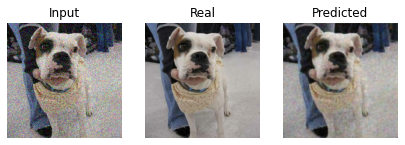

In [46]:
for X,Y in train_dataset:
  Y_hat = model.predict(X)

  plt.figure(figsize=(7,10))
    
  display_list = [X[0], Y[0], Y_hat[0]]
  title = ['Input', 'Real', 'Predicted']    

  for i in range(3):
      plt.subplot(1, 3, i+1)
      plt.title(title[i])
      plt.imshow(display_list[i])
      plt.axis('off')
  plt.show() 
  break

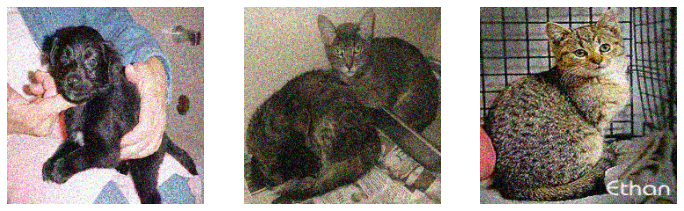

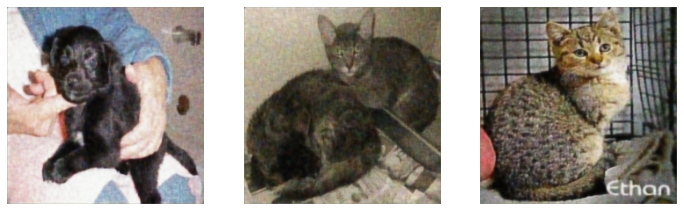

In [49]:
for X,_ in train_dataset:
    Y_hat = model.predict(X)

    columns = 3
    rows = 1

    fig = plt.figure(figsize=(12,8))  
    for i in range(1, columns*rows +1):
        img = X[i].numpy().reshape(224,224,3)
        fig.add_subplot(rows, columns, i)

        plt.axis('off')
        plt.imshow(img)

    fig = plt.figure(figsize=(12,8))  
    for i in range(1, columns*rows +1):
        img = Y_hat[i].reshape(224,224,3)
        fig.add_subplot(rows, columns, i)

        plt.axis('off')
        plt.imshow(img)

    break